In [26]:
# tester to load nanion files

# this initial piece came from nanion themselve and was further modified:

# Import JSON Module
import json
import pandas as pd
# Other Modules
import os.path, struct
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


In [12]:
# find all available json files of that particular recording

import os
import glob

# Define the path to the directory where you want to search for JSON files
json_directory = r"C:\Users\davee\Dropbox\dave\WP\biophysical_essentials\Nav1.3_1.7IT_25deg_1xS_21T04344\Nav1.3_1.7IT_25deg_1xS_21T04344"

# Use glob to recursively search for all .json files
json_files = glob.glob(os.path.join(json_directory, '**', '*.json'), recursive=True)

# Print the list of found JSON files
for file in json_files:
    print(file)


## probably we need user input here which files should be loaded (check list ?!) -> can this be parallelized in multiple threads ? file access !! 


C:\Users\davee\Dropbox\dave\WP\biophysical_essentials\Nav1.3_1.7IT_25deg_1xS_21T04344\Nav1.3_1.7IT_25deg_1xS_21T04344\activierung_20.00.14\activierung_20.00.14.json
C:\Users\davee\Dropbox\dave\WP\biophysical_essentials\Nav1.3_1.7IT_25deg_1xS_21T04344\Nav1.3_1.7IT_25deg_1xS_21T04344\CellCatch_V2.0_19.48.32\CellCatch_V2.0_19.48.32.json
C:\Users\davee\Dropbox\dave\WP\biophysical_essentials\Nav1.3_1.7IT_25deg_1xS_21T04344\Nav1.3_1.7IT_25deg_1xS_21T04344\EBoardCheck_V2.0_19.39.52\EBoardCheck_V2.0_19.39.52.json
C:\Users\davee\Dropbox\dave\WP\biophysical_essentials\Nav1.3_1.7IT_25deg_1xS_21T04344\Nav1.3_1.7IT_25deg_1xS_21T04344\FillChip_V2.0_19.44.54\FillChip_V2.0_19.44.54.json
C:\Users\davee\Dropbox\dave\WP\biophysical_essentials\Nav1.3_1.7IT_25deg_1xS_21T04344\Nav1.3_1.7IT_25deg_1xS_21T04344\inactivation_19.57.25\inactivation_19.57.25.json
C:\Users\davee\Dropbox\dave\WP\biophysical_essentials\Nav1.3_1.7IT_25deg_1xS_21T04344\Nav1.3_1.7IT_25deg_1xS_21T04344\OOFI 1,5ms_20.12.34\OOFI 1,5ms_20.1

In [3]:

#Well_ID_Row = 2         # Well Identification, Counting starts at 0
#Well_ID_Column = 13     # Well Identification, Counting starts at 0, all Wells count (also in PartialPlate)
#Sweep = 5               # Sweep Number to read, Counting starts at 0
############################################




In [13]:
# test files for now: 
json_file = r"C:\Users\davee\Dropbox\dave\WP\biophysical_essentials\Nav1.3_1.7IT_25deg_1xS_21T04344\Nav1.3_1.7IT_25deg_1xS_21T04344\inactivation_19.57.25\inactivation_19.57.25.json"

# Read the whole JSON file into the recording-data dictionary
with open(json_file.replace("\\", "/"), 'r') as file:
    recording_data = json.load(file)

print(recording_data["TraceHeader"]["MeasurementLayout"])

# Read out all necessary information from JSON file
DataName =      recording_data["DatasetIdentifier"]["DataName"]
WP_nCols =      recording_data["TraceHeader"]["Chiplayout"]["WP_nCols"]             # Chip Information: Number of Columns
WP_nRows =      recording_data["TraceHeader"]["Chiplayout"]["WP_nRows"]             # Chip Information: Number of Rows
nCols =         recording_data["TraceHeader"]["MeasurementLayout"]["nCols"]         # Number of Columns measured

ColsMeasured =  recording_data["TraceHeader"]["MeasurementLayout"]["ColsMeasured"]  # Array of Columns measured
NofSweeps =     recording_data["TraceHeader"]["MeasurementLayout"]["NofSweeps"]     # Number of Sweeps measured
NofSamples =    recording_data["TraceHeader"]["MeasurementLayout"]["NofSamples"]    # Number of Samplepoints per Sweep
LeakData =      recording_data["TraceHeader"]["MeasurementLayout"]["Leakdata"]      # Leak Data recorded
SweepsPerFile = recording_data["TraceHeader"]["FileInformation"]["SweepsPerFile"]   # Number of Samplepoints per Sweep
TracefileList = recording_data["TraceHeader"]["FileInformation"]["FileList"]        # List of Tracefiles

# Print all the relevant information
print(f'File Name: {DataName}')
print(f'ChipLayout: Columns: {WP_nCols}')
print(f'ChipLayout: Rows: {WP_nRows}')
print(f'Number of Columns Measured: {nCols}')
print(f'Array of Columns Measured: {ColsMeasured}')
print(f'Number of Sweeps Measured: {NofSweeps}')
print(f'Number of Samplepoints per Sweep: {NofSamples}')
print(f'Leak Data Recorded: {LeakData}')
print(f'Sweeps Per File: {SweepsPerFile}')
print(f'List of Tracefiles: {TracefileList}')

# this should be the information to be collected from every json file ?! 


{'nCols': 24, 'ColsMeasured': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], 'NofSweeps': 12, 'NofSamples': 3600, 'Leakdata': 2}
File Name: inactivation_19.57.25.rec
ChipLayout: Columns: 24
ChipLayout: Rows: 16
Number of Columns Measured: 24
Array of Columns Measured: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Number of Sweeps Measured: 12
Number of Samplepoints per Sweep: 3600
Leak Data Recorded: 2
Sweeps Per File: 10
List of Tracefiles: ['Tracedata_000.dat', 'Tracedata_001.dat']


In [14]:
# another test
json_file = r"C:\Users\davee\Dropbox\dave\WP\biophysical_essentials\Nav1.3_1.7IT_25deg_1xS_21T04344\Nav1.3_1.7IT_25deg_1xS_21T04344\activierung_20.00.14\activierung_20.00.14.json"

# Read the whole JSON file into the recording-data dictionary
with open(json_file.replace("\\", "/"), 'r') as file:
    recording_data = json.load(file)

print(recording_data["TraceHeader"]["MeasurementLayout"])

# Read out all necessary information from JSON file
DataName =      recording_data["DatasetIdentifier"]["DataName"]
WP_nCols =      recording_data["TraceHeader"]["Chiplayout"]["WP_nCols"]             # Chip Information: Number of Columns
WP_nRows =      recording_data["TraceHeader"]["Chiplayout"]["WP_nRows"]             # Chip Information: Number of Rows
nCols =         recording_data["TraceHeader"]["MeasurementLayout"]["nCols"]         # Number of Columns measured

ColsMeasured =  recording_data["TraceHeader"]["MeasurementLayout"]["ColsMeasured"]  # Array of Columns measured
NofSweeps =     recording_data["TraceHeader"]["MeasurementLayout"]["NofSweeps"]     # Number of Sweeps measured
NofSamples =    recording_data["TraceHeader"]["MeasurementLayout"]["NofSamples"]    # Number of Samplepoints per Sweep
LeakData =      recording_data["TraceHeader"]["MeasurementLayout"]["Leakdata"]      # Leak Data recorded
SweepsPerFile = recording_data["TraceHeader"]["FileInformation"]["SweepsPerFile"]   # Number of Samplepoints per Sweep
TracefileList = recording_data["TraceHeader"]["FileInformation"]["FileList"]        # List of Tracefiles

# Print all the relevant information
print(f'File Name: {DataName}')
print(f'ChipLayout: Columns: {WP_nCols}')
print(f'ChipLayout: Rows: {WP_nRows}')
print(f'Number of Columns Measured: {nCols}')
print(f'Array of Columns Measured: {ColsMeasured}')
print(f'Number of Sweeps Measured: {NofSweeps}')
print(f'Number of Samplepoints per Sweep: {NofSamples}')
print(f'Leak Data Recorded: {LeakData}')
print(f'Sweeps Per File: {SweepsPerFile}')
print(f'List of Tracefiles: {TracefileList}')

# this should be the information to be collected from every json file ?! 


{'nCols': 24, 'ColsMeasured': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], 'NofSweeps': 24, 'NofSamples': 1000, 'Leakdata': 2}
File Name: activierung_20.00.14.rec
ChipLayout: Columns: 24
ChipLayout: Rows: 16
Number of Columns Measured: 24
Array of Columns Measured: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Number of Sweeps Measured: 24
Number of Samplepoints per Sweep: 1000
Leak Data Recorded: 2
Sweeps Per File: 10
List of Tracefiles: ['Tracedata_000.dat', 'Tracedata_001.dat', 'Tracedata_002.dat']


Experiment Recording: activierung_20.00.14.rec
Number of Sweeps: 24
Well ID: A1
IV Data: Yes
Leak Data recorded: Yes
Sample Count: 1000


ValueError: x and y must have same first dimension, but have shapes (1000,) and (0,)

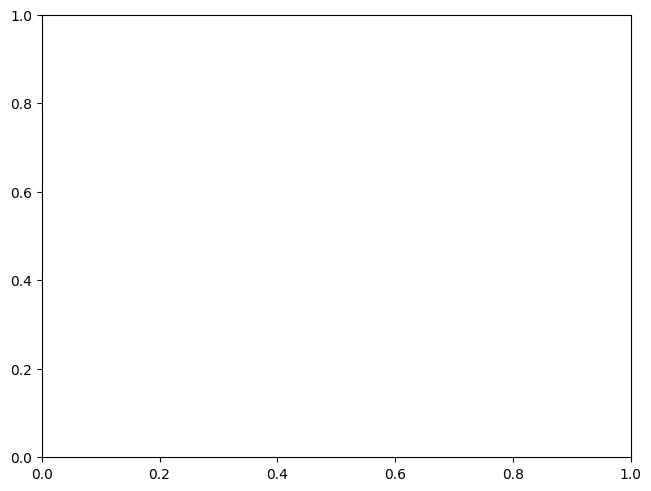

In [41]:
for well_id_column in [0]:#ColsMeasured:
    for well_id_row in range(0,1):
        for sweep in range(19,20):

            #ColsMeasured,NofSweeps,NofSamples,LeakData,SweepsPerFile,TracefileList)

            # Check for IV Measurements and build the Time and Stimulus Array correctly
            IsIV = True if recording_data.get("TraceHeader", {}).get("TimeScalingIV") is not None else False
            if IsIV:
                I2DScale =      recording_data["TraceHeader"]["TimeScalingIV"]["I2DScale"]          # Array of I2D Scale Factors for each Well
                TR_Time =       recording_data["TraceHeader"]["TimeScalingIV"]["TR_Time"]           # Trace Time
                Stimulus =      recording_data["TraceHeader"]["TimeScalingIV"]["Stimulus"][sweep]   # Stimulus (per Sweep Different)
            else:
                I2DScale =      recording_data["TraceHeader"]["TimeScaling"]["I2DScale"]            # Array of I2D Scale Factors for each Well
                TR_Time =       recording_data["TraceHeader"]["TimeScaling"]["TR_Time"]             # Trace Time
                Stimulus =      recording_data["TraceHeader"]["TimeScaling"]["Stimulus"]            # Stimulus

            # Calculate index of the file that contains the target Sweep and first column index that was measured
            target_file_index = (sweep+1) // SweepsPerFile                                      # Index of the Tracefile to be read
            start_column_index = next((i for i, x in enumerate(ColsMeasured) if x != -1), None) # Index of first column measured

            # Calculate the Bytesize for one Well and Sweep
            DataperWell = NofSamples * LeakData * 2     # Bytesize for one Well (Faktore of 2 bytes 1 Values == 2 Bytes)

            # Calculate the Byte Offset and with this the Position within the Tracefile where starting to Read
            ColumnOffset = DataperWell * WP_nRows       # Byte Offset for whole columns
            SweepOffset = ColumnOffset * nCols          # Byte Offset for one Sweep
            ReadOffset = ((sweep) % SweepsPerFile) * SweepOffset + (well_id_column-start_column_index) * ColumnOffset  + well_id_row * DataperWell  # Target Read Position

            # Select and Read Trace from .dat file
            trace_dir = os.path.dirname(json_file)
            tracefile = os.path.join(trace_dir, TracefileList[target_file_index])
            with open (tracefile, 'rb') as file:
                file.seek(ReadOffset)                   # Set the Read Offset
                binary_trace = file.read(DataperWell)   # Read all Traceinformation

            # Transform and Split Trace from ByteArray: 2 Bytes make 1 I16. Transform into Double Values with I2D Scale
            full_trace_raw = struct.unpack('<' + 'h' * (len(binary_trace) // 2), binary_trace)          # 2 Bytes make 1 int
            I2DScale_Well = I2DScale[(well_id_column-start_column_index) * WP_nRows + well_id_row]
            full_trace = [x*I2DScale_Well for x in full_trace_raw]
            Trace_nonleak = full_trace[0:NofSamples]                    
            Trace_leak = full_trace [NofSamples+1:2*NofSamples] if LeakData == 2 else []

            # Output that can be used for any further analysis
            #   Trace_nonleak:  Trace data without leak correction
            #   Trace_leak:     Leak-Corrected Trace (empty if not recorded)
            #   TR_Time:        Array of Time Values for each Trace (=X-Axis)
            #   Stimulus:       Voltage or Current Stimulus Values (Depending on the Mode)

            # Generate Output
            print("Experiment Recording: {}".format(DataName))
            print("Number of Sweeps: {}".format(NofSweeps))
            print("Well ID: {}".format(chr(well_id_row+65)+ str(well_id_column+1)))
            print("IV Data: {}".format("Yes" if IsIV else "No"))
            print("Leak Data recorded: {}".format("Yes" if LeakData==2 else "No"))
            print("Sample Count: {}".format(NofSamples))

            # Visualize Data in a Plot
            fig, ax1 = plt.subplots(layout="constrained")
            ax1.plot(TR_Time, Trace_nonleak, label="Trace")
            ax2 = ax1.twinx()
            ax2.plot(TR_Time, Stimulus, color='red', linewidth = 0.5, label="Stimulus")
            # Formatting Plot
            ax1.set_xlabel("Time in s")
            ax1.set_ylabel("Trace / (A)")
            ax2.set_ylabel("Stimulus / (V)")
            ax1.set_title("Well {} Sweep {} of {}".format((chr(well_id_row+65)+ str(well_id_column+1)), sweep, DataName))
            formatter = ticker.EngFormatter()
            ax1.yaxis.set_major_formatter(formatter)
            ax2.yaxis.set_major_formatter(formatter)
            #Display Plot
            plt.show()



In [22]:
def read_nanion_settings(json_file):
    with open(json_file.replace("\\", "/"), 'r') as file:
        recording_data = json.load(file)

    print("reading recording settings")

    # Read out all necessary information from JSON file
    DataName =      recording_data["DatasetIdentifier"]["DataName"]
    WP_nCols =      recording_data["TraceHeader"]["Chiplayout"]["WP_nCols"]             # Chip Information: Number of Columns
    WP_nRows =      recording_data["TraceHeader"]["Chiplayout"]["WP_nRows"]             # Chip Information: Number of Rows
    nCols =         recording_data["TraceHeader"]["MeasurementLayout"]["nCols"]         # Number of Columns measured

    ColsMeasured =  recording_data["TraceHeader"]["MeasurementLayout"]["ColsMeasured"]  # Array of Columns measured
    NofSweeps =     recording_data["TraceHeader"]["MeasurementLayout"]["NofSweeps"]     # Number of Sweeps measured
    NofSamples =    recording_data["TraceHeader"]["MeasurementLayout"]["NofSamples"]    # Number of Samplepoints per Sweep
    LeakData =      recording_data["TraceHeader"]["MeasurementLayout"]["Leakdata"]      # Leak Data recorded
    SweepsPerFile = recording_data["TraceHeader"]["FileInformation"]["SweepsPerFile"]   # Number of Samplepoints per Sweep
    TracefileList = recording_data["TraceHeader"]["FileInformation"]["FileList"]        # List of Tracefiles

    # Store the extracted information in a dictionary
    recording_info = {
    "file_name": DataName,
    "chiplayout_columns": WP_nCols,
    "chiplayout_rows": WP_nRows,
    "number_of_columns_measured": nCols,
    "array_of_columns_measured": ColsMeasured,
    "number_of_sweeps_measured": NofSweeps,
    "number_of_samplepoints_per_sweep": NofSamples,
    "leak_data_recorded": LeakData,
    "sweeps_per_file": SweepsPerFile,
    "list_of_tracefiles": TracefileList
    }

        # Print the dictionary for debugging puposes
    for key, value in recording_info.items():
        print(f'{key}: {value}')

    return recording_info

In [36]:
def get_nanion_sweep_trace(recording_data, sweep, well_id_row, well_id_column):
   
    IsIV = True if recording_data.get("TraceHeader", {}).get("TimeScalingIV") is not None else False
    if IsIV:
        I2DScale =      recording_data["TraceHeader"]["TimeScalingIV"]["I2DScale"]          # Array of I2D Scale Factors for each Well
        TR_Time =       recording_data["TraceHeader"]["TimeScalingIV"]["TR_Time"]           # Trace Time
        Stimulus =      recording_data["TraceHeader"]["TimeScalingIV"]["Stimulus"][sweep]   # Stimulus (per Sweep Different)
    else:
        I2DScale =      recording_data["TraceHeader"]["TimeScaling"]["I2DScale"]            # Array of I2D Scale Factors for each Well
        TR_Time =       recording_data["TraceHeader"]["TimeScaling"]["TR_Time"]             # Trace Time
        Stimulus =      recording_data["TraceHeader"]["TimeScaling"]["Stimulus"]            # Stimulus

    # Calculate index of the file that contains the target Sweep and first column index that was measured
    target_file_index = (sweep+1) // SweepsPerFile                                      # Index of the Tracefile to be read
    start_column_index = next((i for i, x in enumerate(ColsMeasured) if x != -1), None) # Index of first column measured

    # Calculate the Bytesize for one Well and Sweep
    DataperWell = NofSamples * LeakData * 2     # Bytesize for one Well (Faktore of 2 bytes 1 Values == 2 Bytes)

    # Calculate the Byte Offset and with this the Position within the Tracefile where starting to Read
    ColumnOffset = DataperWell * WP_nRows       # Byte Offset for whole columns
    SweepOffset = ColumnOffset * nCols          # Byte Offset for one Sweep
    ReadOffset = ((sweep) % SweepsPerFile) * SweepOffset + (well_id_column-start_column_index) * ColumnOffset  + well_id_row * DataperWell  # Target Read Position

    # Select and Read Trace from .dat file
    trace_dir = os.path.dirname(json_file)
    tracefile = os.path.join(trace_dir, TracefileList[target_file_index])
    with open (tracefile, 'rb') as file:
        file.seek(ReadOffset)                   # Set the Read Offset
        binary_trace = file.read(DataperWell)   # Read all Traceinformation

    # Transform and Split Trace from ByteArray: 2 Bytes make 1 I16. Transform into Double Values with I2D Scale
    full_trace_raw = struct.unpack('<' + 'h' * (len(binary_trace) // 2), binary_trace)          # 2 Bytes make 1 int
    I2DScale_Well = I2DScale[(well_id_column-start_column_index) * WP_nRows + well_id_row]
    full_trace = [x*I2DScale_Well for x in full_trace_raw]
    Trace_nonleak = full_trace[0:NofSamples]                    
    Trace_leak = full_trace [NofSamples+1:2*NofSamples] if LeakData == 2 else []

    # Output that can be used for any further analysis
    #   Trace_nonleak:  Trace data without leak correction
    #   Trace_leak:     Leak-Corrected Trace (empty if not recorded)
    #   TR_Time:        Array of Time Values for each Trace (=X-Axis)
    #   Stimulus:       Voltage or Current Stimulus Values (Depending on the Mode)

    # Generate Output
    print("Experiment Recording: {}".format(DataName))
    print("Number of Sweeps: {}".format(NofSweeps))
    print("Well ID: {}".format(chr(well_id_row+65)+ str(well_id_column+1)))
    print("IV Data: {}".format("Yes" if IsIV else "No"))
    print("Leak Data recorded: {}".format("Yes" if LeakData==2 else "No"))
    print("Sample Count: {}".format(NofSamples))

    return Trace_nonleak, Stimulus

In [42]:
## for multiple json files: concatenate each well into a single cell to be inserted into BPE

user_selected_json_files = [r"C:\Users\davee\Dropbox\dave\WP\biophysical_essentials\Nav1.3_1.7IT_25deg_1xS_21T04344\Nav1.3_1.7IT_25deg_1xS_21T04344\activierung_20.00.14\activierung_20.00.14.json",
                            r"C:\Users\davee\Dropbox\dave\WP\biophysical_essentials\Nav1.3_1.7IT_25deg_1xS_21T04344\Nav1.3_1.7IT_25deg_1xS_21T04344\inactivation_19.57.25\inactivation_19.57.25.json"]

nanion_recording_info = None

# this should be the information to be collected from every json file ?! 

for json_file in user_selected_json_files:
    print(json_file)

    if not nanion_recording_info:
        nanion_recording_info = read_nanion_settings(json_file)
    else:
        tmp =  read_nanion_settings(json_file)
        if tmp["array_of_columns_measured"] != nanion_recording_info["array_of_columns_measured"]:
           ValueError("Inconsistency in recorded columsn detected")
       
        
for well_id_column in [0]:#ColsMeasured:
    for well_id_row in range(0,2):
       
       for json_file in user_selected_json_files:
            print(f'123 Reading redorcing file {json_file}')
            # Read settings parameters from the JSON file
            # Get the trace for the current sweep
            with open(json_file.replace("\\", "/"), 'r') as file:
                    recording_data = json.load(file)

            # Prepare the DataFrame with appropriate number of rows and columns
            nCols = recording_data["TraceHeader"]["MeasurementLayout"]["NofSweeps"] 
            nRows = recording_data["TraceHeader"]["MeasurementLayout"]["NofSamples"]

            print(nRows)
            # Initialize an empty DataFrame with the specified dimensions
            sweep_df = pd.DataFrame(index=range(nRows), columns=range(nCols))

            # Loop through each sweep and populate the DataFrame with trace data
            for sweep in range(nCols):  # Loop through each column (sweep)
                print(f'Reading sweep {sweep}')
                
                recording_trace, stimulus_trace = get_nanion_sweep_trace(recording_data, sweep, well_id_row, well_id_column)
                
                if len(recording_trace)!=nRows:
                    ValueError("The recording trace has wrong dimensions")
                    sweep_df.iloc[:, sweep] = nRows*[0]
                else:
                    # Add the trace data as a column in the DataFrame
                    sweep_df.iloc[:, sweep] = recording_trace  # Use iloc to place the trace data column-wise

            # Print or return the DataFrame as needed
            print(sweep_df)

            # Plot each column (sweep) as a line in the same figure
            plt.figure(figsize=(10, 6))  # Set figure size

            for sweep in range(sweep_df.shape[1]):  # Iterate over the number of columns (sweeps)
                plt.plot(sweep_df.index, sweep_df.iloc[:, sweep], label=f'Sweep {sweep + 1}')

            # Add labels and title
            plt.xlabel('Sample Points')
            plt.ylabel('Trace Value')
            plt.title('Sweep Traces')

            # Add a legend to distinguish between sweeps
            plt.legend()

            # Show the plot
            plt.show()


C:\Users\davee\Dropbox\dave\WP\biophysical_essentials\Nav1.3_1.7IT_25deg_1xS_21T04344\Nav1.3_1.7IT_25deg_1xS_21T04344\activierung_20.00.14\activierung_20.00.14.json
reading recording settings
file_name: activierung_20.00.14.rec
chiplayout_columns: 24
chiplayout_rows: 16
number_of_columns_measured: 24
array_of_columns_measured: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
number_of_sweeps_measured: 24
number_of_samplepoints_per_sweep: 1000
leak_data_recorded: 2
sweeps_per_file: 10
list_of_tracefiles: ['Tracedata_000.dat', 'Tracedata_001.dat', 'Tracedata_002.dat']
C:\Users\davee\Dropbox\dave\WP\biophysical_essentials\Nav1.3_1.7IT_25deg_1xS_21T04344\Nav1.3_1.7IT_25deg_1xS_21T04344\inactivation_19.57.25\inactivation_19.57.25.json
reading recording settings
file_name: inactivation_19.57.25.rec
chiplayout_columns: 24
chiplayout_rows: 16
number_of_columns_measured: 24
array_of_columns_measured: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16